In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sklearn

# Exercise 1: Diagonal Matrix Operations

In [13]:
# Create a 4x4 matrix
np.random.seed(43)
matrix = np.random.randint(low=0, high=100, size=(4,4))
print('original:\n', matrix)

# Extract its diagonal elements using NumPy.
diags = np.diag(matrix)
print('\ndiagonals:\n', diags)

# Create a diagonal matrix from these elements
result = np.diag(diags)
print('\ndiagonal matrix:\n', result)

# Convert to LateX
def numpy_to_bmatrix(matrix):
    """Convert NumPy array to LaTeX bmatrix string"""
    if len(matrix.shape) != 2:
        raise ValueError("Matrix must be 2-dimensional")
    
    lines = []
    for row in matrix:
        line = " & ".join(str(int(x)) if x == int(x) else str(x) for x in row)
        lines.append(line)
    
    matrix_str = " \\\\\n".join(lines)
    latex_str = f"\\begin{{bmatrix}}\n{matrix_str}\n\\end{{bmatrix}}"
    
    return latex_str

latex_code = numpy_to_bmatrix(result)
print('\n', latex_code)

original:
 [[68 64 49 21]
 [58 16 51 17]
 [59 91 66 30]
 [87 64 35 50]]

diagonals:
 [68 16 66 50]

diagonal matrix:
 [[68  0  0  0]
 [ 0 16  0  0]
 [ 0  0 66  0]
 [ 0  0  0 50]]

 \begin{bmatrix}
68 & 0 & 0 & 0 \\
0 & 16 & 0 & 0 \\
0 & 0 & 66 & 0 \\
0 & 0 & 0 & 50
\end{bmatrix}


# Exercise 2: Conditional Array Operations

In [32]:
# Generate a 1D NumPy array with 20 random elements 
np.random.seed(42)
array_1d = np.random.random(20)
print('Original Array:\n', array_1d)

# Replace all elements greater than 0.5 with the value -1
result = np.where(array_1d > 0.5, -1, array_1d)
print('Result:\n', result)

Original Array:
 [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914]
Result:
 [ 0.37454012 -1.         -1.         -1.          0.15601864  0.15599452
  0.05808361 -1.         -1.         -1.          0.02058449 -1.
 -1.          0.21233911  0.18182497  0.18340451  0.30424224 -1.
  0.43194502  0.29122914]


# Exercise 3: Data Normalization

In [37]:
# Normalize a 1D NumPy array (subtract the mean and divide by the standard deviation).
# Calculate Mean/Std
mean = np.mean(array_1d)
std = np.std(array_1d)

# Normalize Array
normalized = (array_1d - mean) / std
print(normalized)

# Check
print(f"Mean: {np.mean(normalized):.4f}\nStd Dev: {np.std(normalized)}")

[-0.27730331  1.64394295  0.91462239  0.47001683 -1.00596069 -1.00604111
 -1.33252392  1.36205142  0.47820809  0.83485688 -1.4575643   1.70795028
  1.24956743 -0.81816072 -0.91990978 -0.91464282 -0.51171077  0.22359128
 -0.08588732 -0.55510282]
Mean: 0.0000
Std Dev: 1.0


In [43]:
# Method 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create and fit scaler
scaled_data = scaler.fit_transform(array_1d.reshape(-1,1))

print(f"\nScaled data:\n{scaled_data.flatten()}")
print(f"Mean: {scaled_data.mean():.2f}, Std: {scaled_data.std():.2f}")
print(f"Scaler learned mean: {scaler.mean_[0]:.2f}")
print(f"Scaler learned std: {scaler.scale_[0]:.2f}")



Scaled data:
[-0.27730331  1.64394295  0.91462239  0.47001683 -1.00596069 -1.00604111
 -1.33252392  1.36205142  0.47820809  0.83485688 -1.4575643   1.70795028
  1.24956743 -0.81816072 -0.91990978 -0.91464282 -0.51171077  0.22359128
 -0.08588732 -0.55510282]
Mean: 0.00, Std: 1.00
Scaler learned mean: 0.46
Scaler learned std: 0.30


# Exercise 4: Correlation Coefficients

In [46]:
# Create 2 Random Arrays
rng = np.random.default_rng(seed=42)

arr1 = rng.random(20)
print(arr1)
arr2 = rng.random(20)
print(arr2)

coeff = np.corrcoef(arr1, arr2)
print(coeff)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644 ]
[0.75808774 0.35452597 0.97069802 0.89312112 0.7783835  0.19463871
 0.466721   0.04380377 0.15428949 0.68304895 0.74476216 0.96750973
 0.32582536 0.37045971 0.46955581 0.18947136 0.12992151 0.47570493
 0.22690935 0.66981399]
[[1.         0.10550826]
 [0.10550826 1.        ]]


# Exercise 5 : Time Series Trend Line

Slope: -0.004
Intercept: 0.641
R: -0.059
R²: 0.003
P-value: 0.8346
Std Error: 0.0171


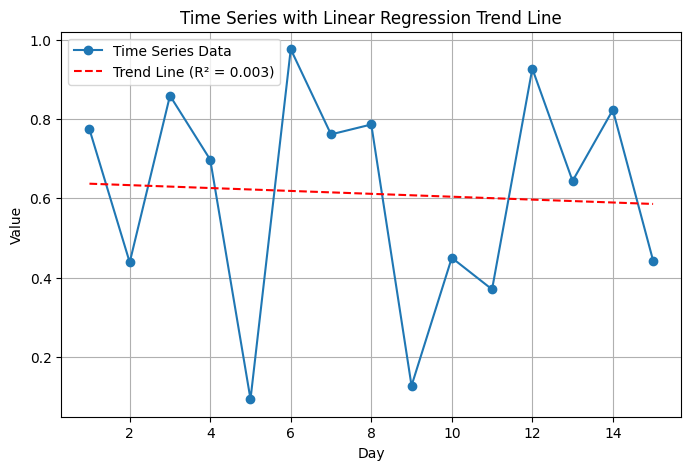

In [54]:
# Create a time series data for 15 days with random values.
rng = np.random.default_rng(seed=42)
days = np.arange(1, 16)
values = rng.random(15)

# Use NumPy to fit a linear trend line to this data and plot both the time series and the trend line.
# Perform Linear Regression
slope, intercept, r_val, p_val, std_err = stats.linregress(days, values)

# Compute the Trend Line
trend = slope*days + intercept

# Print regression details
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R: {r_val:.3f}")
print(f"R²: {r_val**2:.3f}")
print(f"P-value: {p_val:.4f}")
print(f"Std Error: {std_err:.4f}")

# Plot Time Series Data and Trend Line
plt.figure(figsize=(8, 5))
plt.plot(days, values, 'o-', label='Time Series Data')
plt.plot(days, trend, 'r--', label=f'Trend Line (R² = {r_val**2:.3f})')
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Time Series with Linear Regression Trend Line')
plt.legend()
plt.grid(True)
plt.show()

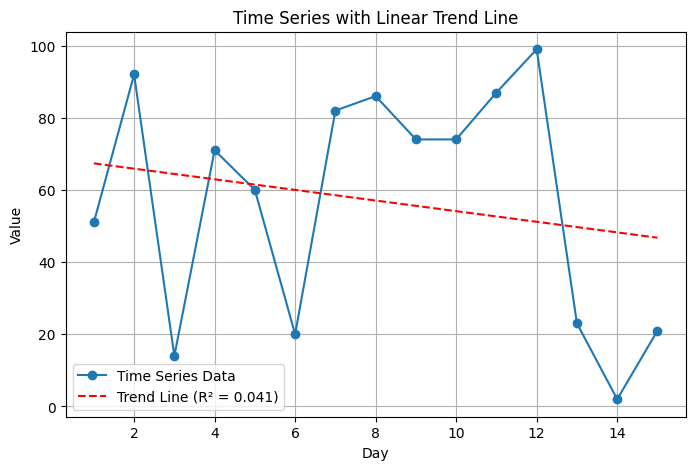

In [68]:
# AGAIN
# Create Series
np.random.seed(42)
days = np.arange(1,16)
values = np.random.randint(low=0, high=100, size=15)

# Use NumPy to fit a linear trend line to this data and plot both the time series and the trend line
m, b = np.polyfit(days, values, 1)
trend = m * days + b

# Find Pearson Coefficient
ss_res = np.sum((values - trend) ** 2)            # residual sum of squares
ss_tot = np.sum((values - np.mean(values)) ** 2)  # total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# plot both the time series and the trend line
plt.figure(figsize=(8, 5))
plt.plot(days, values, 'o-', label='Time Series Data')
plt.plot(days, trend, 'r--', label=f'Trend Line (R² = {r_squared:.3f})')
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Time Series with Linear Trend Line')
plt.legend()
plt.grid(True)
plt.show()


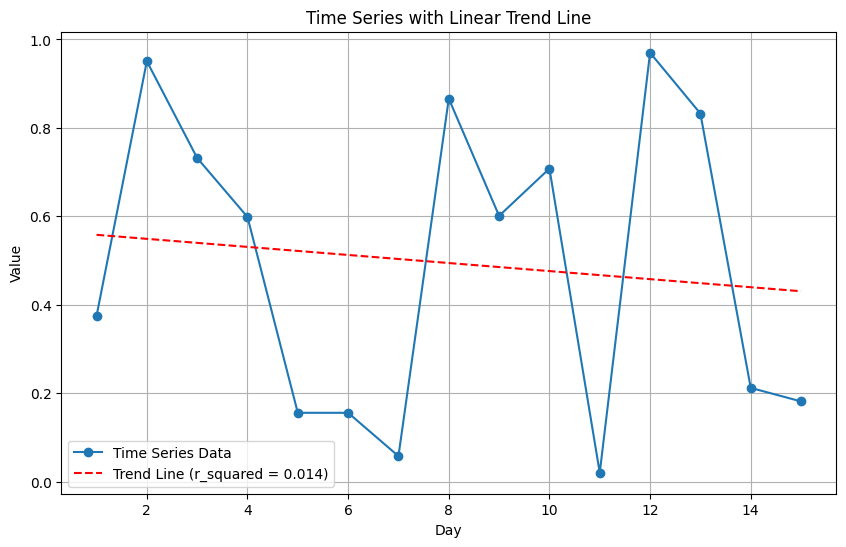

In [77]:
np.random.seed(42)
days = np.arange(1, 16)
values = np.random.rand(15)

slope, intercept, r_value, p_value, s_err = stats.linregress(days, values)
trend = slope * days + intercept

plt.figure(figsize=(10,6))
plt.plot(days, values, 'o-', label="Time Series Data")
plt.plot(days, trend, 'r--', label=f"Trend Line (r_squared = {(r_value**2):.3f})")
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Time Series with Linear Trend Line')
plt.legend()
plt.grid(True)
plt.show()